In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tkinter
import itertools
from matplotlib.pyplot import figure
from matplotlib.ticker import MultipleLocator
#matplotlib.use('TkAgg')
from copy import deepcopy
import pandas as pd
import os
import math
import re

os.chdir('/shared/storage/physnp/seda500/nugrid/nuppn/frames/ppn/1.5_mass_iniab_age_tests/early_phase_high_ang_mom/M15/')

list = sorted(os.listdir(r'./'))#repeated for isomass data
lit = os.listdir(r'./')
acc_rate = [x for x in list if x.startswith('M15')]
sorted_acc_rate = sorted(acc_rate, key=lambda x: float(x.split('_')[1]))
#Stores all data points in one list, a 2D list, each element is from the order 
#they appear in the list flux.
traj_data = [] 
info_data = []
for s in sorted_acc_rate:
    #dir = s
    list2 = sorted(os.listdir(s))
    inner_r = [y for y in list2 if y.startswith('N_Traj')]
    sorted_inner_r = sorted(inner_r, key=lambda x: float(x.split('=')[1]))
    radius = []
    traj_dat = []
    for k in sorted_inner_r:
        #Read in as Pandas DataFrame
        mass_in = pd.read_csv(s + '/' + k +'/trajectory.dat', sep='\s+',
                              skiprows = 7, header = None,
                              usecols =[x for x in range(0,3)], dtype='string')
        #Convert to a list. 
        mass_in_list = mass_in.values.tolist()
        radius.append(s[4:] + k[6:])
        traj_dat.append(mass_in_list)
        
    #Now we need to get the maximum of, store test, just 9th index,
    info_data.append(radius)
    traj_data.append(traj_dat)

In [25]:
print(acc_rate)
print((traj_data[0][0][2]))
print(len(info_data))

print(info_data[0])
#print(traj_data[0][0])

['M15_128e-5', 'M15_16e-5', 'M15_1e-5', 'M15_256e-5', 'M15_2e-5', 'M15_32e-5', 'M15_4e-5', 'M15_64e-5', 'M15_8e-5']
['2.123818E+02', '7.4073E-02', '1.1367E+00']
9
['1e-5_rmin=6.6700E+05', '1e-5_rmin=8.3375E+05', '1e-5_rmin=1.0422E+06', '1e-5_rmin=1.3027E+06', '1e-5_rmin=1.6284E+06', '1e-5_rmin=2.0355E+06', '1e-5_rmin=2.5444E+06', '1e-5_rmin=3.1805E+06', '1e-5_rmin=3.9756E+06', '1e-5_rmin=4.9695E+06']


In [33]:
A = 1

for i in range(len(traj_data[0][0])):
    temp = 0
    temp = float(traj_data[0][0][i][0]) - float(traj_data[0][0][i-1][0])
    if float(temp) < float(A):
        if float(temp) > 0:
            A = float(temp)
print('Shortest timestep in seconds: ' + A)

TypeError: can only concatenate str (not "float") to str

In [18]:
peak_temperature_and_info = [[],[],[]]
peak_density_and_info = [[],[],[]]
for k in range(len(info_data)):
    peak_temp = []
    peak_rho = []
    for i in traj_data[k]:
        max_T = 0
        max_rho = 0
        for j in i:
            if float(j[1]) > max_T:
                max_T = float(j[1])
            if float(j[2]) > max_rho:
                max_rho = float(j[2])
        peak_temp.append(max_T)
        peak_rho.append(max_rho)
    peak_temperature_and_info[1].append(peak_temp)
    peak_density_and_info[1].append(peak_rho)
    accrate = []
    A = []
    for j in info_data[k]:
        A.append(float(j[-10:]))
    accrate.append(j[:-16])
    peak_density_and_info[0].append(A)
    peak_temperature_and_info[0].append(A)
    peak_temperature_and_info[2].append(j[:-16])
    peak_density_and_info[2].append(j[:-16])

In [5]:
acc_to_colours = {
    1e-5:'#1f77b4',  # Blue
    2e-5:'#ff7f0e',  # Orange
    4e-5:'#2ca02c',  # Green
    8e-5:'#d62728',  # Red
    16e-5:'#9467bd',  # Purple
    32e-5:'#8c564b',  # Brown
    64e-5:'#e377c2',  # Pink
    128e-5:'#7f7f7f',  # Gray
    256e-5:'#bcbd22',  # Olive
    512e-5:'#17becf',  # Cyan
    1024e-5:'#ffbb78'   # Light Orange
}

acc_to_c = {value: key for key, value in acc_to_colours.items()}

def acc_to_col(Z):
    if Z in acc_to_colours:
        return acc_to_colours[Z]
    else:
        return f"No conversion found for {Z}"

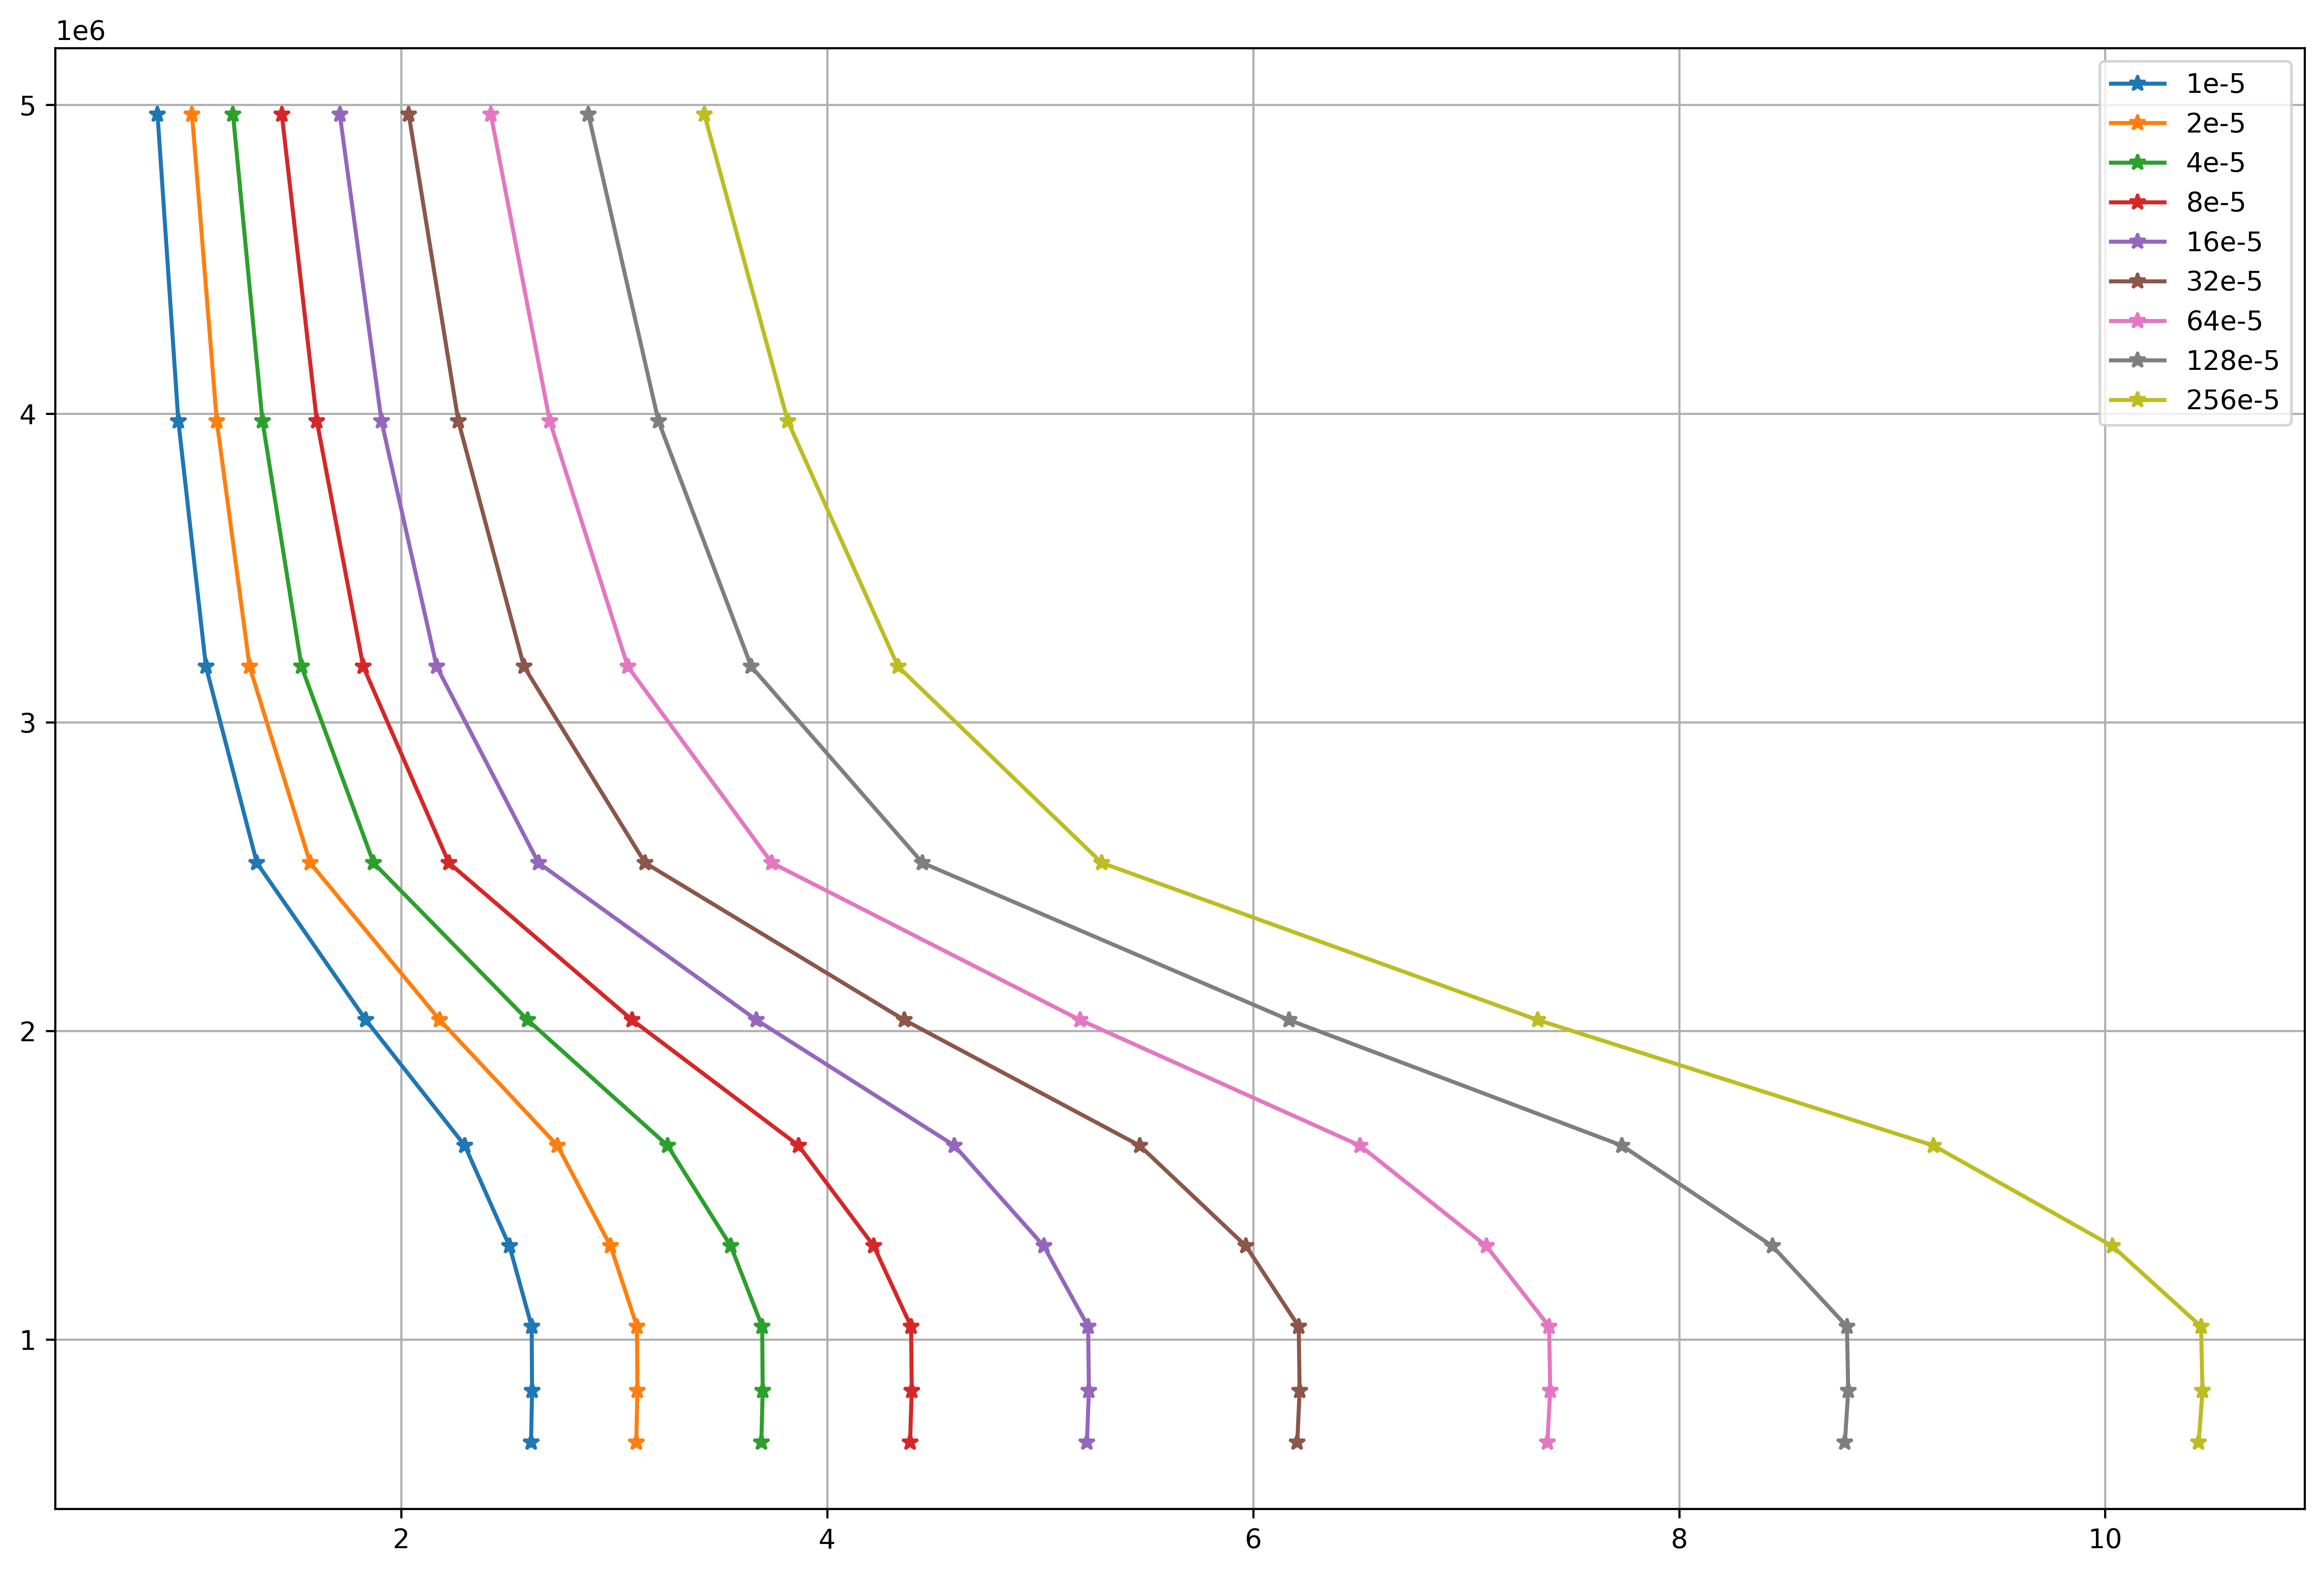

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15,10), dpi =600)

for i in range(len(peak_temperature_and_info[1])):
    tempx = peak_temperature_and_info[1][i]
    tempy = peak_temperature_and_info[0][i]
    ax.plot(tempx, tempy, marker = '*', color = acc_to_col(float(peak_temperature_and_info[2][i])),
    label = peak_temperature_and_info[2][i])
ax.legend()
ax.grid(which = 'both', axis = 'both')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,10), dpi =600)

for i in range(len(peak_density_and_info[1])):
    tempx = peak_density_and_info[1][i]
    tempy = peak_density_and_info[0][i]
    ax.plot(tempx, tempy, color = acc_to_col(float(peak_density_and_info[2][i])),
    label = peak_density_and_info[2][i])
ax.legend()
ax.grid(which = 'both', axis = 'both')

Signature: ax.grid(visible=None, which='major', axis='both', **kwargs)
Docstring:
Configure the grid lines.

Parameters
----------
visible : bool or None, optional
    Whether to show the grid lines.  If any *kwargs* are supplied, it
    is assumed you want the grid on and *visible* will be set to True.

    If *visible* is *None* and there are no *kwargs*, this toggles the
    visibility of the lines.

which : {'major', 'minor', 'both'}, optional
    The grid lines to apply the changes on.

axis : {'both', 'x', 'y'}, optional
    The axis to apply the changes on.

**kwargs : `.Line2D` properties
    Define the line properties of the grid, e.g.::

        grid(color='r', linestyle='-', linewidth=2)

    Valid keyword arguments are:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_p